Installing necessary Libraries

In [102]:
!pip install snowflake-connector-python

                                              0.0/912.5 kB ? eta -:--:--
     -----------                            286.7/912.5 kB 5.9 MB/s eta 0:00:01
     ---------------------------            655.4/912.5 kB 6.9 MB/s eta 0:00:01
     -------------------------------------- 912.5/912.5 kB 6.4 MB/s eta 0:00:00
                                              0.0/105.0 kB ? eta -:--:--
     -------------------------------------- 105.0/105.0 kB 5.9 MB/s eta 0:00:00
                                              0.0/181.5 kB ? eta -:--:--
     ------------------------------------- 181.5/181.5 kB 11.4 MB/s eta 0:00:00
                                              0.0/2.9 MB ? eta -:--:--
     --                                       0.2/2.9 MB 6.3 MB/s eta 0:00:01
     --------                                 0.6/2.9 MB 7.6 MB/s eta 0:00:01
     -------------                            0.9/2.9 MB 7.5 MB/s eta 0:00:01
     -----------------                        1.3/2.9 MB 8.1 MB/s eta 0:00:0


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
!pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing all necessary libraries

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import xgboost as xgb

In [103]:
import snowflake.connector as snwconn

Setting parameters to connect with snowflake-cloud

In [106]:
conn_params = {
  'account': 'JEAEQNT-NX80843',
  'user': 'sudatra',
  'password': 'J@tu2303',
  'warehouse': 'COMPUTE_WH',
  'database': 'JMAN_FINAL_PROJECT',
  'schema': 'DBO_MART'
}

Connecting to snowflake

In [107]:
conn = snwconn.connect(**conn_params)
cursor = conn.cursor()

In [108]:
query = "select * from REGISTERED_FINAL"

cursor.execute(query)
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]

snowflake_df = pd.DataFrame(data, columns=columns)

In [109]:
snowflake_df

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,C7
0,5,13,Data Engineering Bootcamp: Hands-On Training,Data-engineering,18-10-2023,20:20:00,09:04:00,jarvis,Konstanze Kinghorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,5,Gilly,de Cullip,gdecullip4@jimdo.com,Female,junior software engineer,9
1,7,7,Data Science Symposium: Innovations & Insights,Data-science,08-04-2023,15:14:00,01:58:00,tardis,Cacilia Castagnet,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,7,Austin,Stitcher,astitcher6@behance.net,Female,junior software engineer,8
2,3,16,Data Analytics Panel: Industry Experts' Insights,Data-analytics,26-04-2023,21:34:00,03:08:00,aurum,Roseline Jearum,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,3,Peder,Skahill,pskahill2@mozilla.org,Male,intern,1
3,47,10,Data Analytics for Business Professionals,Data-analytics,16-12-2023,13:09:00,02:09:00,groot,Edin Rozzell,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,47,Perice,Whipp,pwhipp1a@redcross.org,Male,senior software engineer,9
4,92,6,Databases Administration Training,Databases,11-10-2023,20:33:00,01:40:00,falcon,Amalle Della,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,92,Aurelie,Jarman,ajarman2j@nsw.gov.au,Non-binary,intern,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,69,18,Full Stack Showcase: Projects and Portfolios,Full-stack,10-05-2024,13:22:00,04:12:00,jarvis,Cully Papis,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,69,Hedy,Skews,hskews1w@list-manage.com,Female,junior software engineer,6
996,88,13,Data Engineering Bootcamp: Hands-On Training,Data-engineering,18-10-2023,20:20:00,09:04:00,jarvis,Konstanze Kinghorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Marcellina,Ashmore,mashmore2f@bizjournals.com,Female,junior software engineer,10
997,57,29,Databases Roundtable Discussion,Databases,17-04-2023,20:02:00,02:03:00,oasis,Lorelle Hallworth,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,57,Aaron,Garbert,agarbert1k@google.it,Bigender,senior software engineer,10
998,41,28,Full Stack Hackathon: Building Next-Gen Apps,Full-stack,25-04-2024,11:07:00,05:12:00,falcon,Marcus Steanyng,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,41,Audi,Lingner,alingner14@arizona.edu,Female,tribe master,5


Storing snowflake data in csv file

In [110]:
snowflake_df.to_csv('snowflake-data.csv', index=False)

Reading Data

In [60]:
dataset = pd.read_csv('./dataset-snowflake.csv')
dataset

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,EXPERIENCE
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,Adel,Schenkel,aschenkel2b@ustream.tv,Female,intern,7
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,Kiley,Cafe,kcafei@un.org,Female,intern,10
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Isador,Chillcot,ichillcot2f@amazon.de,Male,consultant,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,45,Lynelle,Le Noire,llenoire18@cam.ac.uk,Female,tribe master,9
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,7,Ailis,Stickney,astickney6@nih.gov,Female,senior software engineer,10
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,53,Mehetabel,Giocannoni,mgiocannoni1g@cdbaby.com,Female,junior software engineer,5
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,34,Modesta,Klimuk,mklimukx@examiner.com,Polygender,consultant,10


In [61]:
df = dataset.copy()
df

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,EXPERIENCE
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,Adel,Schenkel,aschenkel2b@ustream.tv,Female,intern,7
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,Kiley,Cafe,kcafei@un.org,Female,intern,10
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Isador,Chillcot,ichillcot2f@amazon.de,Male,consultant,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,45,Lynelle,Le Noire,llenoire18@cam.ac.uk,Female,tribe master,9
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,7,Ailis,Stickney,astickney6@nih.gov,Female,senior software engineer,10
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,53,Mehetabel,Giocannoni,mgiocannoni1g@cdbaby.com,Female,junior software engineer,5
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,34,Modesta,Klimuk,mklimukx@examiner.com,Polygender,consultant,10


Analysing Data shapes and performing Data cleaning

In [62]:
df.shape

(1000, 20)

In [63]:
df.describe()

,USERR_ID,EVENT_ID,CAPACITY,REGISTERED,ID,EXPERIENCE
count,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.000000
mean,49.438000,15.454000,46.42000,0.0,49.438000,4.929000
std,28.584213,8.637157,4.79652,0.0,28.584213,3.239823
min,1.000000,1.000000,40.00000,0.0,1.000000,0.000000
25%,24.750000,8.000000,40.00000,0.0,24.750000,2.000000
50%,49.000000,15.000000,50.00000,0.0,49.000000,5.000000
75%,74.000000,23.000000,50.00000,0.0,74.000000,7.000000
max,100.000000,30.000000,50.00000,0.0,100.000000,10.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   USERR_ID       1000 non-null   int64 
 1   EVENT_ID       1000 non-null   int64 
 2   NAME           1000 non-null   object
 3   DOMAIN         1000 non-null   object
 4   DATE           1000 non-null   object
 5   STARTTIME      1000 non-null   object
 6   ENDTIME        1000 non-null   object
 7   LOCATION       1000 non-null   object
 8   TRAINER        1000 non-null   object
 9   CAPACITY       1000 non-null   int64 
 10  REGISTERED     1000 non-null   int64 
 11  RESOURCE_LINK  1000 non-null   object
 12  DESCRIPTION    1000 non-null   object
 13  ID             1000 non-null   int64 
 14  FIRST_NAME     1000 non-null   object
 15  LAST_NAME      1000 non-null   object
 16  EMAIL          1000 non-null   object
 17  GENDER         1000 non-null   object
 18  DESIGNATION    1000 non-null 

In [64]:
null_count = df.isnull().sum()
null_count

USERR_ID         0
EVENT_ID         0
NAME             0
DOMAIN           0
DATE             0
STARTTIME        0
ENDTIME          0
LOCATION         0
TRAINER          0
CAPACITY         0
REGISTERED       0
RESOURCE_LINK    0
DESCRIPTION      0
ID               0
FIRST_NAME       0
LAST_NAME        0
EMAIL            0
GENDER           0
DESIGNATION      0
EXPERIENCE       0
dtype: int64

In [65]:
percentage_null = (null_count / len(df)) * 100
percentage_null

USERR_ID         0.0
EVENT_ID         0.0
NAME             0.0
DOMAIN           0.0
DATE             0.0
STARTTIME        0.0
ENDTIME          0.0
LOCATION         0.0
TRAINER          0.0
CAPACITY         0.0
REGISTERED       0.0
RESOURCE_LINK    0.0
DESCRIPTION      0.0
ID               0.0
FIRST_NAME       0.0
LAST_NAME        0.0
EMAIL            0.0
GENDER           0.0
DESIGNATION      0.0
EXPERIENCE       0.0
dtype: float64

In [66]:
df

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,EXPERIENCE
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,Adel,Schenkel,aschenkel2b@ustream.tv,Female,intern,7
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,Kiley,Cafe,kcafei@un.org,Female,intern,10
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Isador,Chillcot,ichillcot2f@amazon.de,Male,consultant,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,45,Lynelle,Le Noire,llenoire18@cam.ac.uk,Female,tribe master,9
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,7,Ailis,Stickney,astickney6@nih.gov,Female,senior software engineer,10
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,53,Mehetabel,Giocannoni,mgiocannoni1g@cdbaby.com,Female,junior software engineer,5
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,34,Modesta,Klimuk,mklimukx@examiner.com,Polygender,consultant,10


In [67]:
df.head(5)

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,GENDER,DESIGNATION,EXPERIENCE
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,Adel,Schenkel,aschenkel2b@ustream.tv,Female,intern,7
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,Kiley,Cafe,kcafei@un.org,Female,intern,10
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,Male,consultant,1
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Isador,Chillcot,ichillcot2f@amazon.de,Male,consultant,0


In [68]:
df['React'] = np.random.choice([True, False], size=len(df))
df['Javascript'] = np.random.choice([True, False], size=len(df))
df['Node'] = np.random.choice([True, False], size=len(df))
df['Python'] = np.random.choice([True, False], size=len(df))
df['Machine_Learning'] = np.random.choice([True, False], size=len(df))
df['NoSQL'] = np.random.choice([True, False], size=len(df))
df['ETL'] = np.random.choice([True, False], size=len(df))
df['Data_Warehouse'] = np.random.choice([True, False], size=len(df))
df['Big_Data'] = np.random.choice([True, False], size=len(df))
df['HTML'] = np.random.choice([True, False], size=len(df))
df['SQL'] = np.random.choice([True, False], size=len(df))


In [69]:
df['React'] = df.groupby('USERR_ID')['React'].transform('first')
df['Javascript'] = df.groupby('USERR_ID')['Javascript'].transform('first')
df['Node'] = df.groupby('USERR_ID')['Node'].transform('first')
df['Python'] = df.groupby('USERR_ID')['Python'].transform('first')
df['Machine_Learning'] = df.groupby('USERR_ID')['Machine_Learning'].transform('first')
df['NoSQL'] = df.groupby('USERR_ID')['NoSQL'].transform('first')
df['ETL'] = df.groupby('USERR_ID')['ETL'].transform('first')
df['Data_Warehouse'] = df.groupby('USERR_ID')['Data_Warehouse'].transform('first')
df['Big_Data'] = df.groupby('USERR_ID')['Big_Data'].transform('first')
df['HTML'] = df.groupby('USERR_ID')['HTML'].transform('first')
df['SQL'] = df.groupby('USERR_ID')['SQL'].transform('first')

In [70]:
df.head(5)

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,...,False,False,True,False,False,False,True,False,False,True
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,...,True,False,False,True,False,True,False,True,True,False
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,...,False,False,True,True,False,True,True,False,True,True
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,...,False,False,True,True,False,True,True,False,True,True
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,...,True,True,False,True,False,True,False,True,True,False


In [71]:
df_clean = df.copy()
df_clean

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,...,False,False,True,False,False,False,True,False,False,True
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,...,True,False,False,True,False,True,False,True,True,False
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,...,False,False,True,True,False,True,True,False,True,True
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,...,False,False,True,True,False,True,True,False,True,True
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,...,True,True,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,...,True,False,False,False,True,False,False,False,True,True
996,7,6,Databases Conference & Expo,database,04-04-2024,14:51:00,00:41:00,tardis,Kathryn Monckton,50,...,False,False,False,False,True,False,True,False,True,True
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,16:33:00,09:04:00,falcon,Murry Geharke,50,...,True,True,True,True,False,True,True,True,False,False
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,17:53:00,03:11:00,tardis,Clemmie Gallaher,50,...,False,True,False,False,True,True,False,False,True,False


In [36]:
df_clean = df_clean.drop(columns=['EVENT_ID','USERR_ID','REGISTERED','RESOURCE_LINK',
                      'DESCRIPTION','ID','FIRST_NAME','LAST_NAME', 'EMAIL'])
df_clean.head(5)

,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,GENDER,DESIGNATION,EXPERIENCE
0,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,17:35:00,07:17:00,aurum,Dermot Matteoni,50,Female,intern,7
1,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,18:33:00,02:24:00,falcon,Benjamen Pass,40,Female,intern,10
2,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,21:09:00,02:19:00,tardis,Anica Skeemor,40,Male,consultant,1
3,Data Analytics for Business Professionals,data-analytics,24-05-2024,14:48:00,01:59:00,jarvis,Cordey Panton,50,Male,consultant,1
4,Full Stack Development Bootcamp,full-stack,04-07-2023,19:09:00,03:37:00,aurum,Selma Eathorne,50,Male,consultant,0


In [72]:
df_clean.shape

(1000, 31)

In [73]:
df_clean['STARTTIME'] = pd.to_datetime(df_clean['STARTTIME'], format='%H:%M:%S')
df_clean['ENDTIME'] = pd.to_datetime(df_clean['ENDTIME'], format='%H:%M:%S')

In [74]:
df_clean

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Javascript,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,1900-01-01 17:35:00,1900-01-01 07:17:00,aurum,Dermot Matteoni,50,...,False,False,True,False,False,False,True,False,False,True
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,1900-01-01 18:33:00,1900-01-01 02:24:00,falcon,Benjamen Pass,40,...,True,False,False,True,False,True,False,True,True,False
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,1900-01-01 21:09:00,1900-01-01 02:19:00,tardis,Anica Skeemor,40,...,False,False,True,True,False,True,True,False,True,True
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,1900-01-01 14:48:00,1900-01-01 01:59:00,jarvis,Cordey Panton,50,...,False,False,True,True,False,True,True,False,True,True
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,1900-01-01 19:09:00,1900-01-01 03:37:00,aurum,Selma Eathorne,50,...,True,True,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,1900-01-01 17:53:00,1900-01-01 03:11:00,tardis,Clemmie Gallaher,50,...,True,False,False,False,True,False,False,False,True,True
996,7,6,Databases Conference & Expo,database,04-04-2024,1900-01-01 14:51:00,1900-01-01 00:41:00,tardis,Kathryn Monckton,50,...,False,False,False,False,True,False,True,False,True,True
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,1900-01-01 16:33:00,1900-01-01 09:04:00,falcon,Murry Geharke,50,...,True,True,True,True,False,True,True,True,False,False
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,1900-01-01 17:53:00,1900-01-01 03:11:00,tardis,Clemmie Gallaher,50,...,False,True,False,False,True,True,False,False,True,False


In [75]:
df_clean['DURATION'] = (df_clean['STARTTIME'] - df_clean['ENDTIME']).dt.total_seconds() / 3600
df_clean['DURATION'] = df_clean['DURATION'].abs()
df_clean['DURATION'] = df_clean['DURATION'].round()

df_clean

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,STARTTIME,ENDTIME,LOCATION,TRAINER,CAPACITY,...,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,1900-01-01 17:35:00,1900-01-01 07:17:00,aurum,Dermot Matteoni,50,...,False,True,False,False,False,True,False,False,True,10.0
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,1900-01-01 18:33:00,1900-01-01 02:24:00,falcon,Benjamen Pass,40,...,False,False,True,False,True,False,True,True,False,16.0
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,1900-01-01 21:09:00,1900-01-01 02:19:00,tardis,Anica Skeemor,40,...,False,True,True,False,True,True,False,True,True,19.0
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,1900-01-01 14:48:00,1900-01-01 01:59:00,jarvis,Cordey Panton,50,...,False,True,True,False,True,True,False,True,True,13.0
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,1900-01-01 19:09:00,1900-01-01 03:37:00,aurum,Selma Eathorne,50,...,True,False,True,False,True,False,True,True,False,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,1900-01-01 17:53:00,1900-01-01 03:11:00,tardis,Clemmie Gallaher,50,...,False,False,False,True,False,False,False,True,True,15.0
996,7,6,Databases Conference & Expo,database,04-04-2024,1900-01-01 14:51:00,1900-01-01 00:41:00,tardis,Kathryn Monckton,50,...,False,False,False,True,False,True,False,True,True,14.0
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,1900-01-01 16:33:00,1900-01-01 09:04:00,falcon,Murry Geharke,50,...,True,True,True,False,True,True,True,False,False,7.0
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,1900-01-01 17:53:00,1900-01-01 03:11:00,tardis,Clemmie Gallaher,50,...,True,False,False,True,True,False,False,True,False,15.0


In [76]:
df_clean = df_clean.drop(columns=['STARTTIME', 'ENDTIME'])
df_clean

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,...,Node,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,17-10-2023,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,False,True,False,False,False,True,False,False,True,10.0
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,23-07-2023,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,False,False,True,False,True,False,True,True,False,16.0
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,29-09-2023,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,False,True,True,False,True,True,False,True,True,19.0
3,68,16,Data Analytics for Business Professionals,data-analytics,24-05-2024,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,False,True,True,False,True,True,False,True,True,13.0
4,88,4,Full Stack Development Bootcamp,full-stack,04-07-2023,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,True,False,True,False,True,False,True,True,False,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,False,False,False,True,False,False,False,True,True,15.0
996,7,6,Databases Conference & Expo,database,04-04-2024,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,False,False,False,True,False,True,False,True,True,14.0
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,13-12-2023,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,True,True,True,False,True,True,True,False,False,7.0
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,02-04-2024,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,True,False,False,True,True,False,False,True,False,15.0


In [77]:
df_clean['DATE'] = pd.to_datetime(df_clean['DATE'], format='%d-%m-%Y')
df_clean['MONTH'] = df_clean['DATE'].dt.month

df_clean

,USERR_ID,EVENT_ID,NAME,DOMAIN,DATE,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,...,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,2023-10-17,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,True,False,False,False,True,False,False,True,10.0,10
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,2023-07-23,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,False,True,False,True,False,True,True,False,16.0,7
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,2023-09-29,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,True,True,False,True,True,False,True,True,19.0,9
3,68,16,Data Analytics for Business Professionals,data-analytics,2024-05-24,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,True,True,False,True,True,False,True,True,13.0,5
4,88,4,Full Stack Development Bootcamp,full-stack,2023-07-04,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,False,True,False,True,False,True,True,False,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,2024-04-02,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,False,False,True,False,False,False,True,True,15.0,4
996,7,6,Databases Conference & Expo,database,2024-04-04,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,False,False,True,False,True,False,True,True,14.0,4
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,2023-12-13,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,True,True,False,True,True,True,False,False,7.0,12
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,2024-04-02,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,...,False,False,True,True,False,False,True,False,15.0,4


In [78]:
df_clean = df_clean.drop(columns=['DATE'])
df_clean

,USERR_ID,EVENT_ID,NAME,DOMAIN,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,...,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,True,False,False,False,True,False,False,True,10.0,10
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,False,True,False,True,False,True,True,False,16.0,7
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,True,True,False,True,True,False,True,True,19.0,9
3,68,16,Data Analytics for Business Professionals,data-analytics,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,True,True,False,True,True,False,True,True,13.0,5
4,88,4,Full Stack Development Bootcamp,full-stack,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,False,True,False,True,False,True,True,False,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,False,False,True,False,False,False,True,True,15.0,4
996,7,6,Databases Conference & Expo,database,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,False,False,True,False,True,False,True,True,14.0,4
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,True,True,False,True,True,True,False,False,7.0,12
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,False,False,True,True,False,False,True,False,15.0,4


Define Label Encoder for Label Encoding classfication data

In [79]:
label_encoder = LabelEncoder()

In [80]:
!pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# Assuming df is your DataFrame

# Function to calculate Chi-square statistic for boolean columns
def chi_square_for_bool(df):
    chi2_dict = {}
    for col in df.columns:
        if df[col].dtype == bool:
            observed = pd.crosstab(df[col], df['DOMAIN'])  # Assuming 'target_column' is your target variable
            chi2, p, dof, expected = chi2_contingency(observed)
            chi2_dict[col] = (chi2, p)
    return chi2_dict

# Function to calculate ANOVA relation matrix for numerical columns
def anova_relation_matrix(df):
    anova_dict = {}
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            groups = [df[df['DOMAIN'] == val][col].dropna() for val in df['DOMAIN'].unique()]
            anova_result = f_oneway(*groups)
            anova_dict[col] = anova_result
    return anova_dict

In [82]:
chi2_results = chi_square_for_bool(df_clean)
chi2_results


{'React': (2.8268120095627136, 0.5872134039648468),
 'Javascript': (3.2479219271397097, 0.5172256862366591),
 'Node': (1.658096008299443, 0.7983147075060937),
 'Python': (4.611052965555982, 0.32958179262751286),
 'Machine_Learning': (0.187435091969249, 0.9958734776108462),
 'NoSQL': (11.312984445741167, 0.02326280443091315),
 'ETL': (0.47877687772616573, 0.9755338929190552),
 'Data_Warehouse': (7.179205313535303, 0.1267157102610833),
 'Big_Data': (1.4032186333234866, 0.843635409875215),
 'HTML': (2.824770332615458, 0.5875645229669606),
 'SQL': (5.003424225025271, 0.2869463287298099)}

In [83]:
anova_results = anova_relation_matrix(df_clean)
anova_results

c:\Users\sudat\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


{'USERR_ID': F_onewayResult(statistic=0.7515618416309287, pvalue=0.5570342335215459),
 'EVENT_ID': F_onewayResult(statistic=52.599165306082774, pvalue=3.1513032095609796e-40),
 'CAPACITY': F_onewayResult(statistic=12.212634658947369, pvalue=1.0707960954283056e-09),
 'REGISTERED': F_onewayResult(statistic=nan, pvalue=nan),
 'ID': F_onewayResult(statistic=0.7515618416309287, pvalue=0.5570342335215459),
 'EXPERIENCE': F_onewayResult(statistic=1.6688807740226292, pvalue=0.15498956447362008),
 'DURATION': F_onewayResult(statistic=11.683666597944041, pvalue=2.82180773522523e-09),
 'MONTH': F_onewayResult(statistic=108.00002629510439, pvalue=1.869679208908053e-76)}

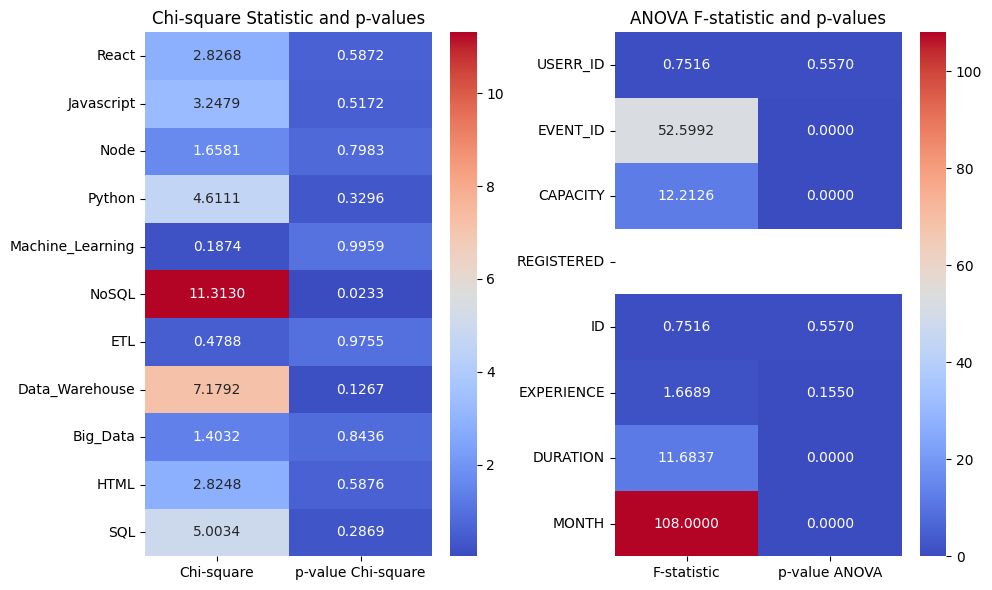

In [84]:
chi2_df = pd.DataFrame(chi2_results).T.rename(columns={0: 'Chi-square', 1: 'p-value Chi-square'})
anova_df = pd.DataFrame(anova_results).T.rename(columns={0: 'F-statistic', 1: 'p-value ANOVA'})

# Create heatmaps
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(chi2_df, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Chi-square Statistic and p-values')

plt.subplot(1, 2, 2)
sns.heatmap(anova_df, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('ANOVA F-statistic and p-values')

plt.tight_layout()
plt.show()


Train Test Split

In [85]:
df_model = df_clean.copy()
X = df_model.drop(columns=['DOMAIN'])
y = df_model['DOMAIN']

In [86]:
df_model

,USERR_ID,EVENT_ID,NAME,DOMAIN,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,...,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,84,15,Advanced Data Engineering Techniques Seminar,data-engineering,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,True,False,False,False,True,False,False,True,10.0,10
1,19,21,Full Stack Webinar Series: Frontend to Backend,full-stack,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,False,True,False,True,False,True,True,False,16.0,7
2,68,27,Data Science Summit: Cutting-Edge Research,data-science,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,True,True,False,True,True,False,True,True,19.0,9
3,68,16,Data Analytics for Business Professionals,data-analytics,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,True,True,False,True,True,False,True,True,13.0,5
4,88,4,Full Stack Development Bootcamp,full-stack,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,False,True,False,True,False,True,True,False,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,full-stack,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,False,False,True,False,False,False,True,True,15.0,4
996,7,6,Databases Conference & Expo,database,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,False,False,True,False,True,False,True,True,14.0,4
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,full-stack,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,True,True,False,True,True,True,False,False,7.0,12
998,34,13,Full Stack Showcase: Projects and Portfolios,full-stack,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,...,False,False,True,True,False,False,True,False,15.0,4


In [87]:
X

,USERR_ID,EVENT_ID,NAME,LOCATION,TRAINER,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,...,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,84,15,Advanced Data Engineering Techniques Seminar,aurum,Dermot Matteoni,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,...,True,False,False,False,True,False,False,True,10.0,10
1,19,21,Full Stack Webinar Series: Frontend to Backend,falcon,Benjamen Pass,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,...,False,True,False,True,False,True,True,False,16.0,7
2,68,27,Data Science Summit: Cutting-Edge Research,tardis,Anica Skeemor,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,...,True,True,False,True,True,False,True,True,19.0,9
3,68,16,Data Analytics for Business Professionals,jarvis,Cordey Panton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,...,True,True,False,True,True,False,True,True,13.0,5
4,88,4,Full Stack Development Bootcamp,aurum,Selma Eathorne,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,...,False,True,False,True,False,True,True,False,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,Full Stack Showcase: Projects and Portfolios,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,45,...,False,False,True,False,False,False,True,True,15.0,4
996,7,6,Databases Conference & Expo,tardis,Kathryn Monckton,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,7,...,False,False,True,False,True,False,True,True,14.0,4
997,53,12,Full Stack Tech Talks: Cutting-Edge Technologies,falcon,Murry Geharke,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,53,...,True,True,False,True,True,True,False,False,7.0,12
998,34,13,Full Stack Showcase: Projects and Portfolios,tardis,Clemmie Gallaher,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,34,...,False,False,True,True,False,False,True,False,15.0,4


In [88]:
X.columns

Index(['USERR_ID', 'EVENT_ID', 'NAME', 'LOCATION', 'TRAINER', 'CAPACITY',
       'REGISTERED', 'RESOURCE_LINK', 'DESCRIPTION', 'ID', 'FIRST_NAME',
       'LAST_NAME', 'EMAIL', 'GENDER', 'DESIGNATION', 'EXPERIENCE', 'React',
       'Javascript', 'Node', 'Python', 'Machine_Learning', 'NoSQL', 'ETL',
       'Data_Warehouse', 'Big_Data', 'HTML', 'SQL', 'DURATION', 'MONTH'],
      dtype='object')

In [89]:
# X=X.drop(columns=['ETL', 'Data_Warehpouse', 'SQL',
#        'Big_Data', 'Data_pipeline', 'HTML', 'Javascript', 'React.js',
#        'Node.js', 'Data_Visualization', 'Statistics', 'Python', 'R',
#        'Machine_Learning', 'Business_intelligence_tools', 'No_Sql',
#        'Data_modelling'])

X = X.drop(columns=['NAME','TRAINER','LOCATION'])

In [90]:
X

,USERR_ID,EVENT_ID,CAPACITY,REGISTERED,RESOURCE_LINK,DESCRIPTION,ID,FIRST_NAME,LAST_NAME,EMAIL,...,Python,Machine_Learning,NoSQL,ETL,Data_Warehouse,Big_Data,HTML,SQL,DURATION,MONTH
0,84,15,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,84,Adel,Schenkel,aschenkel2b@ustream.tv,...,True,False,False,False,True,False,False,True,10.0,10
1,19,21,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,19,Kiley,Cafe,kcafei@un.org,...,False,True,False,True,False,True,True,False,16.0,7
2,68,27,40,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,...,True,True,False,True,True,False,True,True,19.0,9
3,68,16,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,68,Cletis,Privett,cprivett1v@ft.com,...,True,True,False,True,True,False,True,True,13.0,5
4,88,4,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,88,Isador,Chillcot,ichillcot2f@amazon.de,...,False,True,False,True,False,True,True,False,16.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45,13,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,45,Lynelle,Le Noire,llenoire18@cam.ac.uk,...,False,False,True,False,False,False,True,True,15.0,4
996,7,6,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,7,Ailis,Stickney,astickney6@nih.gov,...,False,False,True,False,True,False,True,True,14.0,4
997,53,12,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,53,Mehetabel,Giocannoni,mgiocannoni1g@cdbaby.com,...,True,True,False,True,True,True,False,False,7.0,12
998,34,13,50,0,https://drive.google.com/file/d/16FgMGtttyemBP...,description,34,Modesta,Klimuk,mklimukx@examiner.com,...,False,False,True,True,False,False,True,False,15.0,4


In [91]:
X_test=[50,0,3,7,True,True,True,True,True,True,True,True,True,True,True,10,10]
# X_encoded=X_test.apply(label_encoder.fit_transform)
print(np.shape(X_test))


(17,)


In [92]:
X_test = np.array([50, 0, 3, 7, True, True, True, True, True, True, True, True, True, True, True, 10, 10])

# Reshape X_test to a 2D array with a single row
X_test_reshaped = X_test.reshape(1, -1)

# Check the shape of X_test_reshaped
print(np.shape(X_test_reshaped))

(1, 17)


In [93]:
y_pred = model.predict(X_test_reshaped)
y_pred

NameError: name 'model' is not defined

In [94]:
y

0      data-engineering
1            full-stack
2          data-science
3        data-analytics
4            full-stack
             ...       
995          full-stack
996            database
997          full-stack
998          full-stack
999        data-science
Name: DOMAIN, Length: 1000, dtype: object

In [95]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
X_encoded = X.apply(label_encoder.fit_transform)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Hyperparameter Definitions

In [97]:
# Define hyperparameter grids for each model
param_grid_lr = {'C': [ 0.1, 1, 10]}


Logistic Regression

In [98]:
# Define the logistic regression model
lr = LogisticRegression()

# Define the grid search parameters
param_grid_lr = {'C': [0.1, 1, 10]}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search_lr.best_params_)

# Get the best model
best_lr = grid_search_lr.best_estimator_

# Evaluate the best model on the test set
y_pred = best_lr.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

c:\Users\sudat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sudat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best parameters: {'C': 0.1}
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.75      0.25      0.38        24
data-engineering       0.52      0.32      0.40        34
    data-science       0.21      0.19      0.20        31
        database       0.47      0.63      0.53        43
      full-stack       0.51      0.63      0.57        68

        accuracy                           0.47       200
       macro avg       0.49      0.41      0.42       200
    weighted avg       0.49      0.47      0.45       200



c:\Users\sudat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sudat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [129]:
best_lr = LogisticRegression(C=0.1)

# Train the model
best_lr.fit(X_train, y_train)

# Make predictions
y_pred = best_lr.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.83      0.21      0.33        24
data-engineering       0.67      0.18      0.28        34
    data-science       0.00      0.00      0.00        31
        database       0.46      0.72      0.56        43
      full-stack       0.46      0.78      0.58        68

        accuracy                           0.47       200
       macro avg       0.49      0.38      0.35       200
    weighted avg       0.47      0.47      0.41       200



C:\Users\OmShree\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:



# # Define hyperparameter grids for each model
# param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10]}
# param_grid_dt = {'max_depth': [3, 5, 7, 9, 11]}
# param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7 ]}
# param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2,0.5]}
# param_grid_xgb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2, 0.5]}

# # Initialize models
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "XGBoost": XGBClassifier()
# }

# # Define hyperparameter grids for each model
# param_grids = {
#     "Logistic Regression": param_grid_lr,
#     "Decision Tree": param_grid_dt,
#     "Random Forest": param_grid_rf,
#     "Gradient Boosting": param_grid_gb,
#     "XGBoost": param_grid_xgb
# }

# # Perform hyperparameter tuning for each model
# for name, model in models.items():
#     grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', verbose=1)
#     grid_search.fit(X_train, y_train)
    
#     # Get the best parameters and best score
#     best_params = grid_search.best_params_
#     best_score = grid_search.best_score_
#     print(f"Best parameters for {name}: {best_params}")
#     print(f"Best score for {name}: {best_score}")

#     # Evaluate the best model
#     best_model = grid_search.best_estimator_
#     y_pred = best_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy for {name}: {accuracy}")
#     print(classification_report(y_test, y_pred))
#     print("--------------------------------------------")



Decision Tree Classifier

In [114]:
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       1.00      1.00      1.00        24
data-engineering       1.00      1.00      1.00        34
    data-science       1.00      1.00      1.00        31
        database       1.00      1.00      1.00        43
      full-stack       1.00      1.00      1.00        68

        accuracy                           1.00       200
       macro avg       1.00      1.00      1.00       200
    weighted avg       1.00      1.00      1.00       200



Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Initialize random forest model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.965
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       1.00      0.88      0.93        24
data-engineering       1.00      0.91      0.95        34
    data-science       1.00      0.97      0.98        31
        database       0.93      1.00      0.97        43
      full-stack       0.94      1.00      0.97        68

        accuracy                           0.96       200
       macro avg       0.98      0.95      0.96       200
    weighted avg       0.97      0.96      0.96       200



Support Vector Classifier

In [112]:
from sklearn.svm import SVC

# Initialize SVM model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.385
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       0.00      0.00      0.00        24
data-engineering       0.00      0.00      0.00        34
    data-science       0.00      0.00      0.00        31
        database       0.31      0.51      0.38        43
      full-stack       0.44      0.81      0.57        68

        accuracy                           0.38       200
       macro avg       0.15      0.26      0.19       200
    weighted avg       0.21      0.39      0.28       200



c:\Users\sudat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sudat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sudat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Gradient Boost Classfier

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize gradient boosting model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

  data-analytics       1.00      1.00      1.00        24
data-engineering       1.00      1.00      1.00        34
    data-science       1.00      1.00      1.00        31
        database       1.00      1.00      1.00        43
      full-stack       1.00      1.00      1.00        68

        accuracy                           1.00       200
       macro avg       1.00      1.00      1.00       200
    weighted avg       1.00      1.00      1.00       200

